In [1]:
import pandas as pd



In [2]:
df=pd.read_csv("data/creditcard.csv")
df.head()
df1=df.drop_duplicates()
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X=df1.drop(labels=['Class'],axis=1)
Y=df1[['Class']]


In [4]:
Y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [5]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [6]:
oversample=SMOTE()
X,Y=oversample.fit_resample(X,Y)

In [7]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566501,35903.574359,-3.025506,4.181463,-4.411878,5.467346,-3.184186,-1.449631,-5.707255,2.140752,-5.049442,...,0.922561,1.090028,-0.585473,0.110133,-0.079838,-0.464064,-0.117830,1.085915,0.640610,10.377436
566502,69878.391636,0.009569,1.136387,-2.715650,2.892336,-1.278132,-1.485981,-2.103614,0.557669,-1.279470,...,0.612603,0.442322,-0.450845,-0.291509,0.135953,0.624056,-0.325949,0.570192,0.361203,162.917027
566503,152173.177553,-5.780326,4.319901,-7.842851,5.374862,-1.894464,-2.050522,-4.050302,0.833183,-1.496243,...,-0.487123,0.991215,0.390325,0.433281,-0.063082,-0.108185,0.291328,-2.433127,0.806289,23.661933
566504,112628.573839,-0.344287,-0.564522,-2.153863,4.221431,0.094244,-0.667948,0.376518,-0.547088,-0.452394,...,0.132549,-0.147100,-0.447187,0.254900,0.584691,-0.424101,0.007986,0.252157,-0.408936,424.678304


In [8]:
Y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
566501,1
566502,1
566503,1
566504,1


In [9]:
X=pd.DataFrame(X,columns=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount'])
Y=pd.DataFrame(Y,columns=['Class'])
df2=pd.concat([X,Y],axis=1)
df2.shape

(566506, 31)

In [10]:
scaler=StandardScaler()
X1=df2[['Time','Amount']]
Y1=df2.drop(labels=['Time','Amount'],axis=1)
X1_scaled=scaler.fit_transform(X1)
X1_scaled=pd.DataFrame(X1_scaled,columns=['Time','Amount'])
df2_scaled=pd.concat([X1_scaled,Y1],axis=1)


In [11]:
from sklearn.decomposition import PCA

In [13]:
pca=PCA(n_components=7)
df2_reduced=pca.fit_transform(df2_scaled)
explained_variance_ratio=pca.explained_variance_ratio_


In [ ]:
pca.explained_variance_

array([196.89669082,  25.0394738 ,  17.95536839,  10.31613714,
         3.33390845,   2.79624437,   2.4409431 ])

In [ ]:
col_name=['Time','Amount','TransactionMethod','TransactionId','Location','TypeofCard','Bank']
df2_reduced=pd.DataFrame(df2_reduced,columns=col_name)
df2_reduced
Y2=pd.DataFrame(df2_scaled['Class'],columns=['Class'])
df3=pd.concat([df2_reduced,Y2],axis=1)
df4=df3.loc[:, ~df3.columns.str.contains('^Unnamed')]
df4



,Time,Amount,TransactionMethod,TransactionId,Location,TypeofCard,Bank,Class
0,-9.348388,1.237025,-0.258970,-1.761488,0.948432,-0.646455,-0.320686,0
1,-9.367951,1.047543,-0.321294,-0.565000,-1.207306,0.075317,-0.352355,0
2,-9.444623,1.165345,-0.332214,-1.857070,1.484602,0.157603,1.326626,0
3,-9.503262,1.485550,-0.418160,-1.832877,0.210721,-0.455145,-0.264796,0
4,-9.311218,1.644830,-0.483830,-1.561292,0.201653,-1.367660,-0.226045,0
...,...,...,...,...,...,...,...,...
566501,29.613789,-13.541894,-0.878763,-7.124577,0.132529,0.013290,-0.877550,1
566502,8.622583,-8.435407,0.702823,5.819698,3.806650,0.863985,-2.880697,1
566503,27.988309,1.714481,3.802078,-6.288658,-1.111146,1.150011,-0.457023,1
566504,9.306283,-1.033818,-0.264313,-3.417926,-0.012429,-0.037164,-0.235131,1


<Axes: >

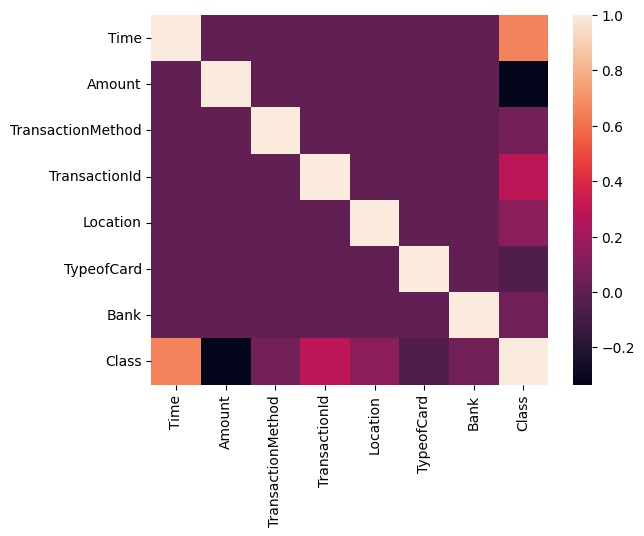

In [ ]:
import seaborn as sns
sns.heatmap(df4.corr())

<Axes: xlabel='Class', ylabel='Count'>

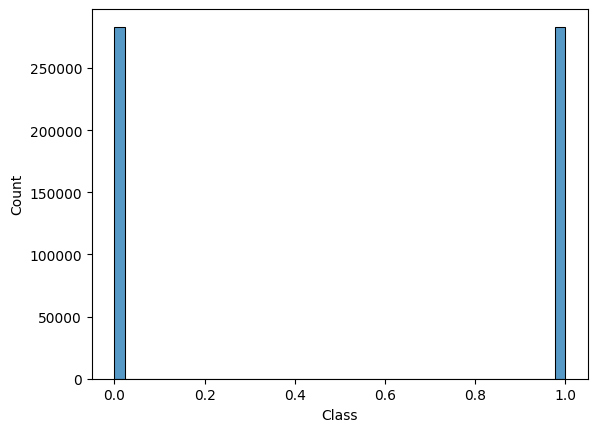

In [ ]:
sns.histplot(df4['Class'])

In [ ]:
df4.to_csv('data/FinalDataset.csv')

In [ ]:
df_new= pd.read_csv('data/FinalDataset.csv')
print(df_new)
X=df_new.drop(labels=['Class'],axis=1)
Y=df_new[['Class']]
numerical_cols = X.select_dtypes(exclude='object').columns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 

num_pipeline=Pipeline(
    steps=[
    ('scaler',StandardScaler())
    ]
)
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
])

        Unnamed: 0       Time     Amount  TransactionMethod  TransactionId  \
0                0  -9.348388   1.237025          -0.258970      -1.761488   
1                1  -9.367951   1.047543          -0.321294      -0.565000   
2                2  -9.444623   1.165345          -0.332214      -1.857070   
3                3  -9.503262   1.485550          -0.418160      -1.832877   
4                4  -9.311218   1.644830          -0.483830      -1.561292   
...            ...        ...        ...                ...            ...   
566501      566501  29.613789 -13.541894          -0.878763      -7.124577   
566502      566502   8.622583  -8.435407           0.702823       5.819698   
566503      566503  27.988309   1.714481           3.802078      -6.288658   
566504      566504   9.306283  -1.033818          -0.264313      -3.417926   
566505      566505  -0.369898  -2.397816          -0.244487       1.517668   

        Location  TypeofCard      Bank  Class  
0       0.94843

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [ ]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [ ]:
X_train.head()

,num_pipeline__Unnamed: 0,num_pipeline__Time,num_pipeline__Amount,num_pipeline__TransactionMethod,num_pipeline__TransactionId,num_pipeline__Location,num_pipeline__TypeofCard,num_pipeline__Bank
0,0.292424,-0.098726,-0.295893,-0.075804,-0.466890,0.793125,-0.712221,0.027744
1,-1.547686,-0.677475,0.248606,-0.010234,-0.487331,0.682668,-0.954171,-0.178924
2,-0.818984,-0.686664,0.191296,0.062674,-0.372972,-0.261567,-0.088031,-0.569511
3,-0.649206,-0.682759,0.246689,-0.055425,-0.403466,-0.805113,0.401097,0.155511
4,-0.448633,-0.646951,0.452015,-0.172885,-0.332494,-0.400908,0.011412,-0.209255


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_param2=SVC(kernel='rbf',gamma=0.01,C=100)
svc_param2.fit(X_train,y_train)

c:\Users\adity\OneDrive\Desktop\projects\CardFraud\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, gamma=0.01)

In [ ]:
from sklearn.metrics import classification_report
def evaluate_model(true, predicted):
    report=classification_report(true,predicted)
   
    return report

model={
    "SVC":SVC(kernel='rbf',gamma=0.01,C=100)
}
trained_model_list=[]
model_list=[]


for i in range(len(list(model))):
    model=list(model.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)
    report=evaluate_model(y_test,y_pred)
    print('Model Training Performance')
    print(report)
   


c:\Users\adity\OneDrive\Desktop\projects\CardFraud\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Training Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85055
           1       1.00      1.00      1.00     84897

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



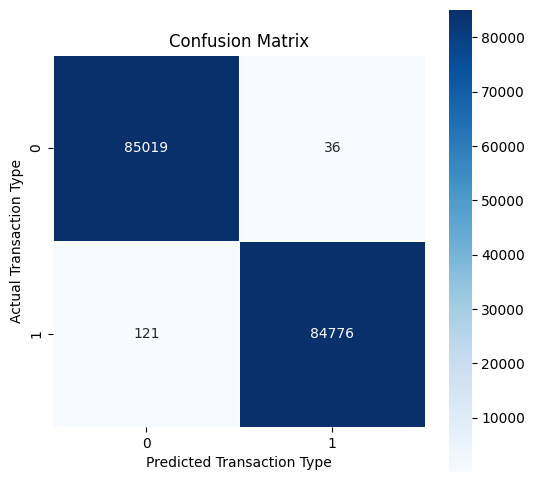

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
plt.xlabel('Predicted Transaction Type')
plt.ylabel('Actual Transaction Type')
plt.title('Confusion Matrix')
plt.show()

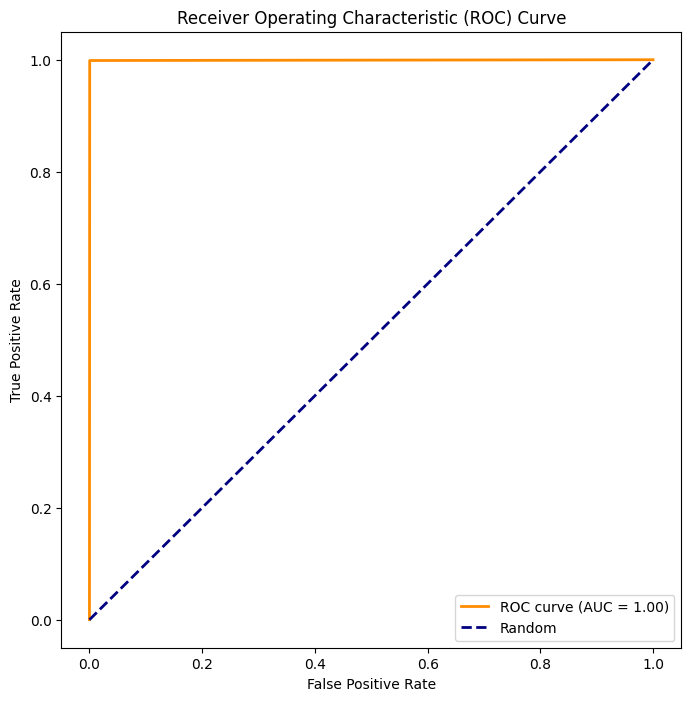

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Example data (replace this with your actual data)
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
